Spotify Streaming data from March 9th, 2022 - April 23rd, 2022


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date


Import Excel data

In [ ]:
def load_data(file):                                                    
    return pd.read_excel(file, sep = ",", index_col = False, header=0)
songs=pd.read_excel("StreamingHistory.xlsx")

-Analyze raw data to ensure you can account for missing data

-Look at the values in each column

In [ ]:
songs.count()

record              0
endTime          2608
day              2608
wkday            2608
time             2608
artistName       2608
trackName        2608
milisecPlayed    2608
dtype: int64

This code tells you have many columns and rows there are in your dataframe

In [ ]:
print(songs.shape)

(2608, 8)




```
# This is formatted as code
```

Dropped the 'record' column because they were not useful. It did not have any values in the column

In [ ]:
# Remove column name 'record'
songs_clean=songs.drop(['record'], axis = 1)

In [ ]:
print(songs_clean.shape)

(2608, 7)


Here, I am only concerned with the songs that were listened to for more than 1 minute(>60,0000 miliseconds). I would consider songs that were listened to for less than 1 minute to be skips or the individual did not like the song enough to listen to the whole thing.

In [ ]:
#Drop songs that are listened to for less than 60,000 miliseconds
songs_filtered = songs_clean[songs_clean['milisecPlayed'] >= 60000]

In [ ]:
# Print the new dataframe
print(songs_filtered)

               endTime         day wkday   time     artistName  \
0     2022-03-09 15:00  2022-03-09   Wed  15:00           LÉON   
1     2022-03-09 15:03  2022-03-09   Wed  15:03           LÉON   
2     2022-03-09 15:06  2022-03-09   Wed  15:06           LÉON   
3     2022-03-09 15:09  2022-03-09   Wed  15:09           LÉON   
5     2022-03-10 03:20  2022-03-10   Thu  03:20           LÉON   
...                ...         ...   ...    ...            ...   
2603  2022-04-23 10:49  2022-04-23   Sat  10:49        JORDANN   
2604  2022-04-23 10:52  2022-04-23   Sat  10:52  Lennon Stella   
2605  2022-04-23 10:56  2022-04-23   Sat  10:56          BENEE   
2606  2022-04-23 11:01  2022-04-23   Sat  11:01        Kimchii   
2607  2022-04-23 11:05  2022-04-23   Sat  11:05        Glassio   

                            trackName  milisecPlayed  
0                    Wishful Thinking         243203  
1                              Soaked         212262  
2                   Fade Into A Dream     

In [ ]:
# Print the shape of the dataframe
print(songs_filtered.shape)

(2127, 7)


In [ ]:
# iterating the columns to print the column names
for col in songs.columns:
    print(col)

record
endTime
day
wkday
time
artistName
trackName
milisecPlayed


**Goal:** Find what day of the week most songs are streamed

In [ ]:
#define days and time music is played
df = pd.DataFrame(songs_filtered)
  
# select columns
df[['day','wkday', 'milisecPlayed']]

,day,wkday,milisecPlayed
0,2022-03-09,Wed,243203
1,2022-03-09,Wed,212262
2,2022-03-09,Wed,171901
3,2022-03-09,Wed,205953
5,2022-03-10,Thu,200715
...,...,...,...
2603,2022-04-23,Sat,220146
2604,2022-04-23,Sat,181533
2605,2022-04-23,Sat,240946
2606,2022-04-23,Sat,340985


In [ ]:
#Adding up the values that are played on Monday

monday=df.loc[df['wkday'] =='Mon','milisecPlayed'].sum()
mondaysongs=monday/60000
mondaysongs

1304.7198666666666

In [ ]:
#Adding up the values that are played on Tuesday

tuesday=df.loc[df['wkday'] =='Tue','milisecPlayed'].sum()
tuesdaysongs=tuesday/60000
tuesdaysongs

852.7872333333333

In [ ]:
#Adding up the values that are played on Wednesday

wednesday=df.loc[df['wkday'] =='Wed','milisecPlayed'].sum()
wednesdaysongs=wednesday/60000
wednesdaysongs

709.7929666666666

In [ ]:
#Adding up the values that are played on Thursday

thursday=df.loc[df['wkday'] =='Thu','milisecPlayed'].sum()
thursdaysongs=thursday/60000
thursdaysongs

870.2789833333334

In [ ]:
#Adding up the values that are played on Friday

friday=df.loc[df['wkday'] =='Fri','milisecPlayed'].sum()
fridaysongs=friday/60000
fridaysongs

1582.42215

In [ ]:
#Adding up the values that are played on Saturday

saturday=df.loc[df['wkday'] =='Sat','milisecPlayed'].sum()
saturdaysongs=saturday/60000
saturdaysongs

1384.6175833333334

In [ ]:
#Adding up the values that are played on Sunday

sunday=df.loc[df['wkday'] =='Sun','milisecPlayed'].sum()
sundaysongs=sunday/60000
sundaysongs

1038.0428833333333

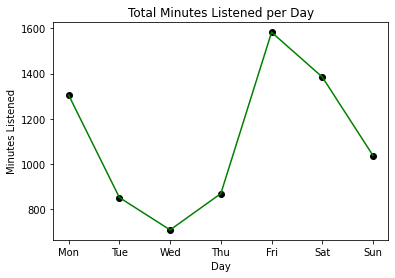

In [ ]:
# Creating the graph to display Weekdays and minutes listened

day = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
min_listened = [1304.7198666666666,852.7872333333333,709.7929666666666,
                870.2789833333334,1582.42215,1384.6175833333334,
                1038.0428833333333]
plt.plot(day, min_listened, color='Green')
plt.scatter(day, min_listened, color='Black')
plt.xlabel('Day')
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

Findings: Here we can see that the user listened to music the most on Friday and the least on Wednesdays. With this information, this user should have more new music ads on Friday because the user is more likely to see it! If Spotify wants to encourage the user to use the app more during the lower listened to days, they should auto play more 'low-fi' or 'chill' music. This user seems to be busier Tuesday, Wednesday and Thursday so they may not want over-baring music when they are focused.

**Goal**: Find top 10 most streamed song 

In [ ]:
# Assign a variable to number of times each track name appears in the dataframe
trackName=pd.value_counts(songs_filtered['trackName'])
print(trackName)

muse                                            42
Love Me Like I Am                               38
Look Like That                                  35
scorton's creek - re-imagined by filous         33
Big Energy                                      31
                                                ..
Situations                                       1
Upside Down                                      1
I Can't Help Myself (Sugar Pie, Honey Bunch)     1
Remedy                                           1
Are You Having Fun Without Me?                   1
Name: trackName, Length: 909, dtype: int64


In [ ]:
#Display the first 10 tracks in the trackName variable
top10=trackName.head(10)
print(top10)

muse                                       42
Love Me Like I Am                          38
Look Like That                             35
scorton's creek - re-imagined by filous    33
Big Energy                                 31
All My Heroes                              28
Soaked                                     26
Lift You Up                                26
N/S                                        22
Less Than Zero                             22
Name: trackName, dtype: int64


Text(0, 0.5, 'Count')

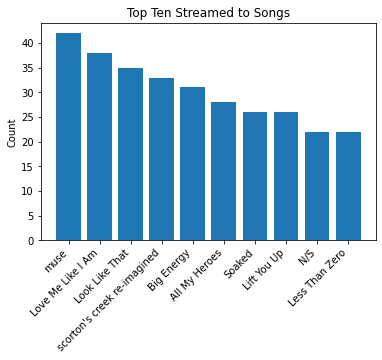

In [ ]:
# Create a bar graph showing top 10 played song names and the number they were streamed
trackName = ['muse','Love Me Like I Am','Look Like That','scorton\'s creek re-imagined',
             'Big Energy','All My Heroes','Soaked','Lift You Up','N/S','Less Than Zero'] 
Count=[42,38,35,33,31,28,26,26,22,22]
plt.bar(trackName,Count)  
plt.xticks(rotation=45, ha='right')
figsize=(20,20)
plt.title('Top Ten Streamed to Songs')
plt.ylabel('Count')

Findings: Most listened to song is 'muse' 

Interpretation: Spotify should target music that is in the same genre or artist for this user

**Goal:** Find the top 20 most streamed artist

In [ ]:
#Assign a variable to artists and count the times they were streamed 
Artists=pd.value_counts(songs_filtered['artistName'])
print(Artists)

LÉON                      246
Florence + The Machine    130
for KING & COUNTRY         81
Tim Atlas                  61
MisterWives                45
                         ... 
Wrabel                      1
Bruno Major                 1
Wild Rivers                 1
James Bay                   1
Kimchii                     1
Name: artistName, Length: 394, dtype: int64


In [ ]:
#Print the top 20 artists streamed 
Artists.head(20)

LÉON                      246
Florence + The Machine    130
for KING & COUNTRY         81
Tim Atlas                  61
MisterWives                45
Ariana Grande              39
The Weeknd                 39
COIN                       38
Isaac Dunbar               35
Latto                      32
Ellie Goulding             28
John Mayer                 27
Thomas Newman              26
Justin Timberlake          26
Lana Del Rey               24
Litany                     23
Stray Kids                 22
Bad Suns                   22
Post Malone                22
The Morning Toast          20
Name: artistName, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  if __name__ == '__main__':


Text(0, 0.5, 'Count')

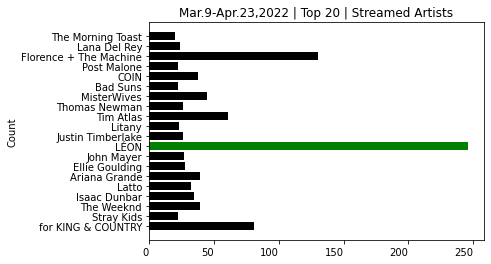

In [ ]:
#Create a horizontal bar graph displaying streams associated with artists

artistsName = ['for KING & COUNTRY','Stray Kids',
'The Weeknd','Isaac Dunbar','Latto','Ariana Grande',
'Ellie Goulding','John Mayer','LÉON','Justin Timberlake',
'Litany','Tim Atlas','Thomas Newman','MisterWives','Bad Suns','COIN',
'Post Malone','Florence + The Machine','Lana Del Rey','The Morning Toast'] 
Count=[81,22, 39,35,32,39,28,27,246,26,23,61,26,45,22,38,22,130,24,20]
plt.barh(artistsName, Count, color='kkkkkkkkgkkkkkkkkkkkk')
figsize=(20,20)
plt.xticks(ha='right')
plt.title('Mar.9-Apr.23,2022 | Top 20 | Streamed Artists')
plt.ylabel('Count')

Findings: LEON is the most listened to artists 
Interpretation: Spotify should target more of her songs or at least auto-play LEON songs when a playlists is finished or songs are not queued

----------------------------------------------------------

**Goal:** Find how many songs are on each playlists

Import Playlist data

In [ ]:
def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
playlists=pd.read_excel("Playlist1.xlsx")

In [ ]:
#Values in each columns of the dataset
#Data set name is playlists and there is a 'playlists' column
playlists.count()

playlists              0
name                  23
lastModifiedDate      23
items                  0
track                  0
trackName            513
artistName           513
albumName            513
trackUri             513
episode                0
localTrack             0
description            0
numberOfFollowers     23
dtype: int64

In [ ]:
#cleaning the data by removing columns that do not help with the goal
playlists_clean=playlists.drop(['playlists','items','track','episode','trackUri','localTrack','description','numberOfFollowers'], axis = 1)
playlists_clean.count()

name                 23
lastModifiedDate     23
trackName           513
artistName          513
albumName           513
dtype: int64

In [ ]:
#Listing column names that are still in the dataframe
for col in playlists_clean.columns:
    print(col)

name
lastModifiedDate
trackName
artistName
albumName


In [ ]:
# create a variable and delete columns with NaN(empty) values
#Defining a variable to the dataframe that will look at the dates each playlists was made
playlists_date=playlists_clean.dropna()
playlists_date

,name,lastModifiedDate,trackName,artistName,albumName
0,UF Mems,2022-04-11,Talk,Khalid,Talk
3,Draft Pretty Boys,2021-12-18,Close To You,Dayglow,Close To You
34,One Magic,2021-11-23,Evermore,Dan Stevens,Beauty and the Beast
40,Sea leaves,2021-08-04,Laurel Leaves,Modern Aquatic,Laurel Leaves
44,Girls Night Out,2021-07-08,Fergalicious,Fergie,The Dutchess
49,21 Party,2021-11-17,I Took A Pill In Ibiza - Seeb Remix,Mike Posner,"At Night, Alone."
55,Happy,2021-11-11,Lovely Day,Bill Withers,Menagerie
68,Chill car playlist,2021-06-08,Moving On and Getting Over,John Mayer,The Search for Everything
83,Chillaxin,2020-10-20,Imagination,Foster The People,Imagination
104,Hide and Seek,2020-09-14,Hide and Seek,Imogen Heap,Speak for Yourself


In [ ]:
playlists_date.shape

(23, 5)

In [ ]:
# select two columns
playlists_date[['name','lastModifiedDate']]

,name,lastModifiedDate
0,UF Mems,2022-04-11
3,Draft Pretty Boys,2021-12-18
34,One Magic,2021-11-23
40,Sea leaves,2021-08-04
44,Girls Night Out,2021-07-08
49,21 Party,2021-11-17
55,Happy,2021-11-11
68,Chill car playlist,2021-06-08
83,Chillaxin,2020-10-20
104,Hide and Seek,2020-09-14


In [ ]:
playlists_date[['lastModifiedDate']]

,lastModifiedDate
0,2022-04-11
3,2021-12-18
34,2021-11-23
40,2021-08-04
44,2021-07-08
49,2021-11-17
55,2021-11-11
68,2021-06-08
83,2020-10-20
104,2020-09-14


----------------------------------------------------------

GOAL: 

Make an organized time series chart of the playlists and when they were last modified

Here, we are assigning variables to the names and dates that we want displayed on the timeline. This will make it easier to work with the data and organize it on the visual

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
dates = []
names = []

names =['UF Mems','Draft Pretty Boys','One Magic','Sea leaves','Girls Night Out',
    '21 Party','Happy','Chill car playlist','Chillaxin','Hide and Seek',
    'Soft Cream Beats','Pop Lovin','Groovy Gal','Nice Day',
    'Disney\'s Poppin Tunes','Dark side of the moon','1901','Work it out',
    'Lord, I need you!!',"'Liked from Radio'",'Love City','Nicole\'s Hits',
    'Background']

dates = ['2022-04-11','2021-12-18','2021-11-23','2021-08-04',
             '2021-07-08','2021-11-17','2021-11-11','2021-06-08','2020-10-20',
             '2020-09-14','2021-02-12','2020-05-18','2021-08-12','2020-12-28',
             '2019-12-17','2021-04-09','2021-06-08','2022-01-29','2020-10-07',
             '2019-12-28','2021-05-06','2020-12-11','2021-10-02']

# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y-%m-%d") for d in dates]

Use the variables that are set to organize on the timeline


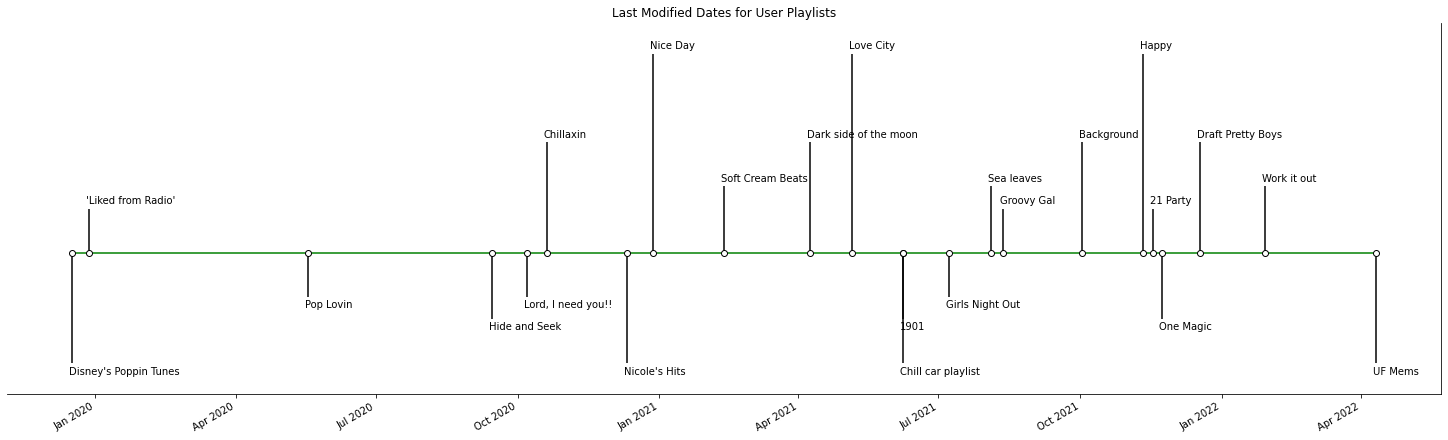

In [ ]:
# Choose some nice levels- this alows to put the label names at different
# levels so there is no overlap
levels = np.tile([ -5, 5, -3, 3,-2, 2, 9],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20, 6), constrained_layout=True)
ax.set(title="Last Modified Dates for User Playlists")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="k-", basefmt="g-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="left")

# format xaxis with 3 month intervals
ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=3))
ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

**Goal:** Find how many songs are on each playlist- create a bar chart showing playlist # of songs

In [ ]:
#Create a variable that shows how many songs are in each playlist
name=pd.value_counts(playlists_clean['name'])
print(name)

UF Mems                  1
Groovy Gal               1
Nicole's Hits            1
Love City                1
Liked from Radio         1
Lord, I need you!!       1
Work it out              1
1901                     1
Dark side of the moon    1
Disney's Poppin Tunes    1
Nice Day                 1
Pop Lovin'               1
Draft Pretty Boys        1
Soft Cream Beats         1
Hide and Seek            1
Chillaxin                1
Chill car playlist       1
Happy                    1
21 Party                 1
Girls Night Out          1
Sea leaves               1
One Magic                1
Background               1
Name: name, dtype: int64


In [ ]:
#Use the '.shape' function to see how many playlists there are
name.shape

(23,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Playlists Names')

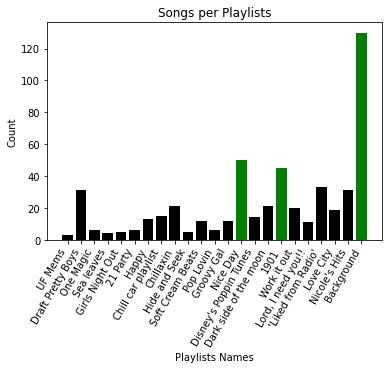

In [ ]:
#Create a bar graph that displays songs on each playlist 
playlist_Name = ['UF Mems','Draft Pretty Boys','One Magic','Sea leaves','Girls Night Out',
    '21 Party','Happy','Chill car playlist','Chillaxin','Hide and Seek',
    'Soft Cream Beats','Pop Lovin','Groovy Gal','Nice Day',
    'Disney\'s Poppin Tunes','Dark side of the moon','1901','Work it out',
    'Lord, I need you!!',"'Liked from Radio'",'Love City','Nicole\'s Hits',
    'Background'] 
Count=[3,31,6,4,5,6,13,15,21,5,12,6,12,50,14,21,45,20,11,33,19,31,130]

#Use a color to label to top 3 playlists
plt.bar(playlist_Name, Count, color='kkkkkkkkkkkkkgkkgkkkkkg')
figsize=(30,30)
plt.xticks(rotation=60, ha='right')
plt.title('Songs per Playlists')
plt.ylabel('Count')
plt.xlabel('Playlists Names')